# Acompanhamento de DCNTs 

## Banco de dados SIM (Sistema de mortalidade)

In [14]:
from pysus.online_data import SIM
from pysus.preprocessing.decoders import decodifica_idade_SIM, translate_variables_SIM
from pysus.online_data import IBGE
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')


In [15]:
sidra_df = get_sidra_table(2094,3,2011)

NameError: name 'get_sidra_table' is not defined

In [ ]:
sidra_df

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Ano (Código),Ano,Variável (Código),Variável,Cor ou raça (Código),Cor ou raça,Religião (Código),Religião
1,3,Unidade da Federação,45,Pessoas,1562409,11,Rondônia,2010,2010,93,População residente,0,Total,0,Total
2,3,Unidade da Federação,45,Pessoas,733559,12,Acre,2010,2010,93,População residente,0,Total,0,Total
3,3,Unidade da Federação,45,Pessoas,3483985,13,Amazonas,2010,2010,93,População residente,0,Total,0,Total
4,3,Unidade da Federação,45,Pessoas,450479,14,Roraima,2010,2010,93,População residente,0,Total,0,Total
5,3,Unidade da Federação,45,Pessoas,7581051,15,Pará,2010,2010,93,População residente,0,Total,0,Total
6,3,Unidade da Federação,45,Pessoas,669526,16,Amapá,2010,2010,93,População residente,0,Total,0,Total
7,3,Unidade da Federação,45,Pessoas,1383445,17,Tocantins,2010,2010,93,População residente,0,Total,0,Total
8,3,Unidade da Federação,45,Pessoas,6574789,21,Maranhão,2010,2010,93,População residente,0,Total,0,Total
9,3,Unidade da Federação,45,Pessoas,3118360,22,Piauí,2010,2010,93,População residente,0,Total,0,Total


In [ ]:
def baixa_estados():
    url_UF = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados'
    df_UF = pd.read_json(url_UF)
    regiao = pd.json_normalize(df_UF["regiao"]).rename(
        columns={"id": "id_regiao", "sigla": "sigla_regiao", "nome": "nome_regiao"})
    return pd.concat([df_UF, regiao], axis=1).drop('regiao', axis=1)
df_UF = baixa_estados()


In [ ]:


# https://sidra.ibge.gov.br/tabela/2094
def baixa_populacao_estados_2000_2010():
    url_pop = "https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela2094.csv&terr=NC&rank=-&query=t/2094/n3/all/v/allxp/p/all/c86/0/c133/0/d/v93%200/l/v,p%2Bc86,t%2Bc133"
    return pd.read_csv(url_pop, delimiter=";", skiprows=5, nrows=27, usecols=[0, 1, 3, 4], names=["Cód.", "Unidade da Federação", "2000", "2010"])


# Retirado de https://sidra.ibge.gov.br/tabela/6579
def baixa_populacao_estados():
    url_pop = "https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela6579.csv&terr=NC&rank=-&query=t/6579/n3/all/v/all/p/all/l/v,p,t"
    df_pop = pd.read_csv(url_pop, delimiter=";", skiprows=3, nrows=27)
    df_pop_2010 = baixa_populacao_estados_2000_2010()
    return pd.concat([df_pop, df_pop_2010.loc[:, ["2000", "2010"]]], axis=1, join="inner")



def baixa_populacao_brasil():
    url_pop = "https://sidra.ibge.gov.br/geratabela?format=br.csv&name=tabela6579.csv&terr=NC&rank=-&query=t/6579/n1/all/v/all/p/all/l/v,p,t"
    return pd.read_csv(url_pop, delimiter=";", skiprows=3, nrows=1)




In [ ]:
df_pop = baixa_populacao_estados()
df_pop

,Cód.,Unidade da Federação,2001,2002,2003,2004,2005,2006,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2000,2010
0,11,Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1493565,1503928,...,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278,1380952,1562409
1,12,Acre,574355,586942,600595,630328,669736,686652,680075,691132,...,790101,803513,816687,829619,869265,881935,894470,906876,557882,733559
2,13,Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3341094,3393369,...,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995,2817252,3483985
3,14,Roraima,337237,346871,357302,381896,391317,403344,412783,421499,...,496936,505665,514229,522636,576568,605761,631181,652713,324397,450479
4,15,Pará,6341736,6453683,6574993,6850181,6970586,7110465,7321490,7431020,...,8073924,8175113,8272724,8366628,8513497,8602865,8690745,8777124,6195965,7581051
5,16,Amapá,498735,516511,534835,547400,594587,615715,613166,626609,...,750912,766679,782295,797722,829494,845731,861773,877613,477032,669526
6,17,Tocantins,1184895,1207014,1230181,1262644,1305728,1332441,1280513,1292051,...,1496880,1515126,1532902,1550194,1555229,1572866,1590248,1607363,1157690,1383445
7,21,Maranhão,5730467,5803224,5873655,6021504,6103327,6184538,6305537,6367138,...,6850884,6904241,6954036,7000229,7035055,7075181,7114598,7153262,5657552,6574789
8,22,Piauí,2873010,2898223,2923725,2974698,3006885,3036290,3111881,3145325,...,3194718,3204028,3212180,3219257,3264531,3273227,3281480,3289290,2843428,3118360
9,23,Ceará,7547620,7654535,7758441,7976563,8097276,8217085,8450528,8547809,...,8842791,8904459,8963663,9020460,9075649,9132078,9187103,9240580,7431597,8452381


In [ ]:
df_pop.describe()

,Cód.,2001,2002,2003,2004,2005,2006,2008,2009,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2000,2010
count,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,29.111111,6.384660e+06,6.467887e+06,6.550794e+06,6.724780e+06,6.821639e+06,6.917428e+06,7.022408e+06,7.091875e+06,7.125159e+06,...,7.509947e+06,7.572224e+06,7.632646e+06,7.691146e+06,7.722033e+06,7.783227e+06,7.842803e+06,7.900653e+06,6.291587e+06,7.065030e+06
std,13.024631,7.741959e+06,7.844378e+06,7.943662e+06,8.153212e+06,8.268003e+06,8.382938e+06,8.422573e+06,8.496513e+06,8.470477e+06,...,8.931753e+06,8.995865e+06,9.058296e+06,9.118981e+06,9.183905e+06,9.251328e+06,9.316952e+06,9.380644e+06,7.631950e+06,8.410049e+06
min,11.000000,3.372370e+05,3.468710e+05,3.573020e+05,3.818960e+05,3.913170e+05,4.033440e+05,4.127830e+05,4.214990e+05,4.601650e+05,...,4.969360e+05,5.056650e+05,5.142290e+05,5.226360e+05,5.765680e+05,6.057610e+05,6.311810e+05,6.527130e+05,3.243970e+05,4.504790e+05
25%,19.000000,2.104242e+06,2.143232e+06,2.179738e+06,2.254922e+06,2.298788e+06,2.340882e+06,2.446610e+06,2.483692e+06,2.543770e+06,...,2.736014e+06,2.783032e+06,2.829801e+06,2.876296e+06,2.861363e+06,2.897127e+06,2.932272e+06,2.966756e+06,2.064608e+06,2.509592e+06
50%,27.000000,3.155016e+06,3.201722e+06,3.250219e+06,3.352024e+06,3.408365e+06,3.464285e+06,3.453646e+06,3.487199e+06,3.547055e+06,...,3.885049e+06,3.938336e+06,3.999415e+06,4.025558e+06,3.996496e+06,4.018650e+06,4.064052e+06,4.108508e+06,3.097498e+06,3.514952e+06
75%,38.000000,7.777914e+06,7.869601e+06,7.960152e+06,8.150237e+06,8.255434e+06,8.359844e+06,8.592362e+06,8.679032e+06,8.697530e+06,...,9.060259e+06,9.124816e+06,9.187000e+06,9.246863e+06,9.285972e+06,9.344574e+06,9.401862e+06,9.457686e+06,7.680376e+06,8.624414e+06
max,53.000000,3.763011e+07,3.817774e+07,3.870932e+07,3.982523e+07,4.044280e+07,4.105573e+07,4.101164e+07,4.138404e+07,4.158718e+07,...,4.403530e+07,4.439648e+07,4.474970e+07,4.509487e+07,4.553894e+07,4.591905e+07,4.628933e+07,4.664913e+07,3.703546e+07,4.126220e+07


In [ ]:

def trata_dados_datas(df, dados_datas):
    for dado in dados_datas:
        df.loc[:, dado] = pd.to_datetime(df.loc[:, dado], format="%d%m%Y")
    return df

def baixa_dados(ano, estado="SC"):
    dados = SIM.download(estado, ano)
    dados_limpos = translate_variables_SIM(dados)
    df = pd.DataFrame.from_dict(dados_limpos)
    dados_datas = ["DTOBITO"]
    df = trata_dados_datas(df, dados_datas)
    df["ANOOBITO"] = pd.DatetimeIndex(df["DTOBITO"]).year
    return df    

In [ ]:
def gera_lista_doencas():
    # Neoplasias  C00 - C97
    neoplasias = ["C%.2d" % x for x in range(00, 98)] # + ["C%.3d" % x for x in range(0, 970)] 
    # Doenças cardiovasculares I00 - I99
    doencas_cardiovasculares = ["I%.2d" % x for x in range(
        00, 100)]   #+ ["I%.3d" % x for x in range(0, 1000)]
    # Doenças respiratórias crônicas J30 - J98 (exceto J36)
    doencas_respiratorias = ["J%.2d" % x for x in range(30, 99) if x != 36] #+ ["J%.3d" % x for x in range(300, 990) if x != range(360,370)]
    # Diabetes Mielitus E10 - E14
    diabetes = ["E%.2d" % x for x in range(10, 15)] # + ["E%.3d" % x for x in range(100, 150)]
    tabagismo = ['F17'] # + ["F%.3d" % x for x in range(170, 180)]  # Tabagismo
    dict_doencas = {'neoplasia': neoplasias,
     'doencas_cardiovasculares':  doencas_cardiovasculares,
     'doencas_respiratorias': doencas_respiratorias, 
     'diabetes': diabetes,
    #  'tabagismo': tabagismo
     }
    return dict_doencas


def baixa_dados_multiplos(anos, estados):
    df = []
    for estado in estados:
        for ano in anos:
            df.append(baixa_dados(ano, estado))
    return pd.concat(df)




In [ ]:
lista_doencas = gera_lista_doencas()
for doenca in lista_doencas:
    print(lista_doencas[doenca])


['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97']
['I00', 'I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44

In [ ]:
sum(lista_doencas.values(), [])

['C00',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C08',
 'C09',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'C33',
 'C34',
 'C35',
 'C36',
 'C37',
 'C38',
 'C39',
 'C40',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55',
 'C56',
 'C57',
 'C58',
 'C59',
 'C60',
 'C61',
 'C62',
 'C63',
 'C64',
 'C65',
 'C66',
 'C67',
 'C68',
 'C69',
 'C70',
 'C71',
 'C72',
 'C73',
 'C74',
 'C75',
 'C76',
 'C77',
 'C78',
 'C79',
 'C80',
 'C81',
 'C82',
 'C83',
 'C84',
 'C85',
 'C86',
 'C87',
 'C88',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C94',
 'C95',
 'C96',
 'C97',
 'I00',
 'I01',
 'I02',
 'I03',
 'I04',
 'I05',
 'I06',
 'I07',
 'I08',
 'I09',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17',
 'I18',
 'I19',
 'I20',
 'I21',
 'I22',
 'I23',
 'I24',
 'I25',
 'I26',


## Exemplo Santa Catarina

Comparação com dados obtidos no texto [Doenças Crônicas Não-transmissíveis: Cenário Bahia (2018)](http://www.saude.ba.gov.br/wp-content/uploads/2017/11/boletim-de-dcnt-2018-12.pdf)



In [ ]:
anos = list(range(2010,2021))
estados = ['SC']
df = baixa_dados_multiplos(anos, estados)
df = df.loc[:, ["TIPOBITO", "DTOBITO", "SEXO", "IDADE_ANOS", "DTNASC",
                "RACACOR", "CODMUNRES", "LOCOCOR", "CAUSABAS", "ANOOBITO"]]

/Users/lrsantos/.local/share/virtualenvs/DCNT-hIwSmSRi/lib/python3.9/site-packages/pysus/preprocessing/decoders.py:122: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = tab_mun[(tab_mun["SITUACAO"] != "IGNOR")]
/Users/lrsantos/.local/share/virtualenvs/DCNT-hIwSmSRi/lib/python3.9/site-packages/pysus/preprocessing/decoders.py:122: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = tab_mun[(tab_mun["SITUACAO"] != "IGNOR")]
/Users/lrsantos/.local/share/virtualenvs/DCNT-hIwSmSRi/lib/python3.9/site-packages/pysus/preprocessing/decoders.py:122: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = tab_mun[(tab_mun["SITUACAO"] != "IGNOR")]
/Users/lrsantos/.local/share/virtualenvs/DCNT-hIwSmSRi/lib/python3.9/site-packages/pysus/pr

In [ ]:
lista_doencas = gera_lista_doencas()
lista_CIDs = sum(lista_doencas.values(), [])   
kwstr = '|'.join(lista_CIDs)
df_dcnt = df[(df["CAUSABAS"].str.contains(kwstr))]
df_dcnt.insert(0,"TPODCNT", "")
for doenca in lista_doencas:
    kwstr_doenca = '|'.join(lista_doencas[doenca])
    df_dcnt.loc[(df_dcnt["CAUSABAS"].str.contains(kwstr_doenca)), "TPODCNT"] = doenca


In [ ]:
df_dcnt

,TPODCNT,TIPOBITO,DTOBITO,SEXO,IDADE_ANOS,DTNASC,RACACOR,CODMUNRES,LOCOCOR,CAUSABAS,ANOOBITO
0,neoplasia,2,2010-10-03,Masculino,91.0,13041919,Branca,4216305,3,C61,2010
1,doencas_cardiovasculares,2,2010-02-15,Masculino,79.0,18041930,Branca,4213500,3,I500,2010
2,doencas_cardiovasculares,2,2010-11-08,Feminino,78.0,20111931,Branca,4219705,3,I500,2010
3,neoplasia,2,2010-05-04,Masculino,62.0,15071947,Branca,4203154,3,C710,2010
4,neoplasia,2,2010-05-17,Feminino,68.0,28021942,Branca,4203154,3,C349,2010
...,...,...,...,...,...,...,...,...,...,...,...
46436,neoplasia,2,2020-12-31,Feminino,72.0,18111948,Branca,4214201,1,C509,2020
46437,doencas_cardiovasculares,2,2020-12-31,Feminino,87.0,07061933,Branca,4214904,4,I509,2020
46438,neoplasia,2,2020-12-31,Feminino,82.0,30061938,Branca,4216503,3,C240,2020
46439,neoplasia,2,2020-12-31,Feminino,79.0,24031941,Branca,4205407,3,C349,2020


In [ ]:
df_pop_anos = df_pop.loc[df_pop["Cód."] == 42, ["%02d" % i for i in anos]].T
df_pop_anos = df_pop_anos.rename(columns={21: "Pop"})
df_pop_anos


,Pop
2010,6248436
2011,6317054
2012,6362734
2013,6634254
2014,6727148
2015,6819190
2016,6910553
2017,7001161
2018,7075494
2019,7164788


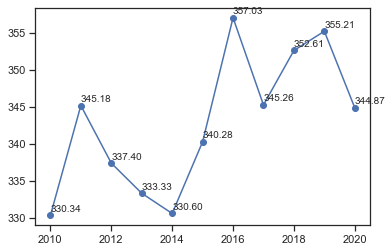

In [ ]:
fig, ax = plt.subplots(1,1)
result =  pd.DataFrame(df_dcnt.groupby(["ANOOBITO"]).size(), columns = ["OBITOS"])
result["POP"] = df_pop_anos.loc[:, "Pop"].values
result["OBITOS100ha"] = (result.OBITOS * 100_000) / result.POP
ax.plot(result.index, result.OBITOS100ha, marker="o")

for row in result.itertuples():
    ax.text(row[0], row[3]+.5, "%.2f" % row[3])

In [ ]:
result

,OBITOS,POP,OBITOS100ha
ANOOBITO,,,
2010,20641,6248436,330.338664
2011,21805,6317054,345.176723
2012,21468,6362734,337.402129
2013,22114,6634254,333.330620
2014,22240,6727148,330.600724
2015,23204,6819190,340.275018
2016,24673,6910553,357.033656
2017,24172,7001161,345.257022
2018,24949,7075494,352.611422


In [ ]:
df_dcnt.groupby(["CODMUNRES", "ANOOBITO", "TPODCNT"]).size()


CODMUNRES  ANOOBITO  TPODCNT                 
4200051    2010      diabetes                     1
                     doencas_cardiovasculares     3
                     doencas_respiratorias        3
                     neoplasia                    4
                     tabagismo                    0
                                                 ..
nan        2020      diabetes                     4
                     doencas_cardiovasculares    67
                     doencas_respiratorias       10
                     neoplasia                   48
                     tabagismo                    0
Length: 16170, dtype: int64

<AxesSubplot:xlabel='ANOOBITO'>

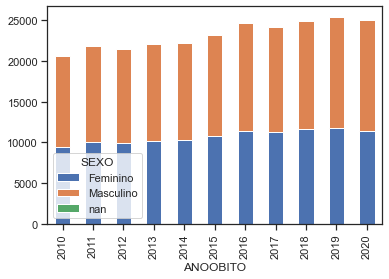

In [ ]:
df_dcnt.groupby(["ANOOBITO","SEXO"]).size().dropna().unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='TPODCNT'>

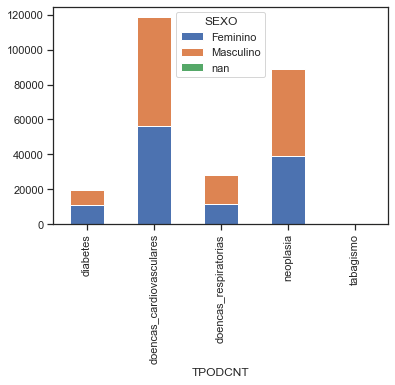

In [ ]:
df_dcnt.groupby(["TPODCNT","SEXO"]).size().dropna().unstack().plot.bar(stacked = True)

In [ ]:
df

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,IDADE_ANOS
0,1,2,13042020,0630,842,420990,21071935,484,Masculino,Branca,...,,,,,,,,,505,84.0
1,1,2,30032020,2010,842,421490,19081957,462,Masculino,Branca,...,,,,,,,,,506,62.0
2,1,2,09052020,0545,842,421490,10081967,452,Masculino,Branca,...,,,,,,,,,507,52.0
3,1,2,12052020,1120,843,430490,08081954,465,Masculino,Branca,...,,,,,,,,,508,65.0
4,1,2,20052020,0500,842,421660,29081933,486,Masculino,Branca,...,,,,,,,,,509,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46439,1,2,31122020,1030,842,421570,24031941,479,Feminino,Branca,...,,,,,,,,,1555129,79.0
46440,1,2,31122020,0200,842,420650,10011979,441,Masculino,Branca,...,,,,,,,,,1555210,41.0
46441,2,2,15062020,2038,842,420540,10021941,479,Masculino,Branca,...,,,,,,,,,1555927,79.0
46442,2,2,16052020,1040,833,330455,09081938,481,Masculino,Branca,...,,,,,,,,,1555928,81.0


In [ ]:
df_dcnt

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,IDADE_ANOS
7,1,2,17052020,2130,842,421460,14011956,464,Feminino,Branca,...,,,,,,,,,512,64.0
11,1,2,23052020,0545,842,421650,03031957,463,Masculino,Parda,...,,,,,,,,,516,63.0
28,1,2,25042020,0130,842,420220,06071957,462,Feminino,Branca,...,,,,,,,,,1310,62.0
34,1,2,04032020,1756,842,420260,23081944,475,Masculino,Branca,...,,,,,,,,,1316,75.0
36,1,2,17032020,1730,842,420850,06011936,484,Feminino,Branca,...,,,,,,,,,1318,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46386,1,2,31122020,0855,842,421930,10121945,475,Feminino,Branca,...,,,,,,,,,1553901,75.0
46389,1,2,31122020,0919,842,420990,21101945,475,Masculino,Branca,...,,,,,,,,,1553918,75.0
46409,1,2,31122020,0622,842,421320,19051949,471,Masculino,Branca,...,,,,,,,,,1554030,71.0
46417,1,2,31122020,0946,842,420820,08081923,497,Masculino,Branca,...,,,,,,,,,1554078,97.0
